In [38]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
matplotlib.rc("font", family= 'Noto Sans CJK JP')
from scipy.stats import chi2_contingency
from scipy import stats

In [12]:
mem=pd.read_csv("/home/piai/바탕화면/2. Big Data 분석/members_completed.csv")
mem.head()

,회원번호,회원상태,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지
0,18764160,정상회원,여,68,농협중앙회,기혼,False,서울특별시,성동구
1,18792000,정상회원,남,83,연결앱결제,기혼,False,강원도,강릉시
2,18942336,정상회원,여,39,신한은행,기혼,False,인천광역시,중구
3,18949760,정상회원,여,73,기업은행,기혼,NaN,강원도,홍천군
4,19391488,정상회원,여,52,연결앱결제,기혼,False,대전광역시,중구


In [11]:
sales=pd.read_csv("/home/piai/바탕화면/2. Big Data 분석/Sales.csv")
sales.head()

,회원번호,회원상태,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,사용 포인트 네이버,주문취소여부,주문시간,제품번호,월,일,요일
0,1032097472,정상회원,1.0,7083,2021-01-02,NaN,NaN,0,0,1,13:00:00,100021783V2_1337,1,2,Saturday
1,1032097472,정상회원,1.0,29865,2021-01-02,2021-01-02,2021-01-02,0,0,0,13:00:00,100022137V2_1606,1,2,Saturday
2,1032097472,정상회원,1.0,23164,2021-01-02,2021-01-02,2021-01-03,0,0,0,13:00:00,100021452V2_1113,1,2,Saturday
3,369152832,정상회원,1.0,16655,2021-01-02,2021-01-02,2021-01-03,0,0,0,13:00:00,10002931V2_708,1,2,Saturday
4,1032097472,정상회원,1.0,8423,2021-01-02,NaN,NaN,0,0,1,13:00:00,100022085V2_1559,1,2,Saturday


In [15]:
tmp = pd.merge(mem,sales, on="회원번호", how="left")

In [20]:
tmp1 = tmp.groupby('요일')['구매금액'].sum()

In [34]:
tmp1=pd.DataFrame(tmp1)

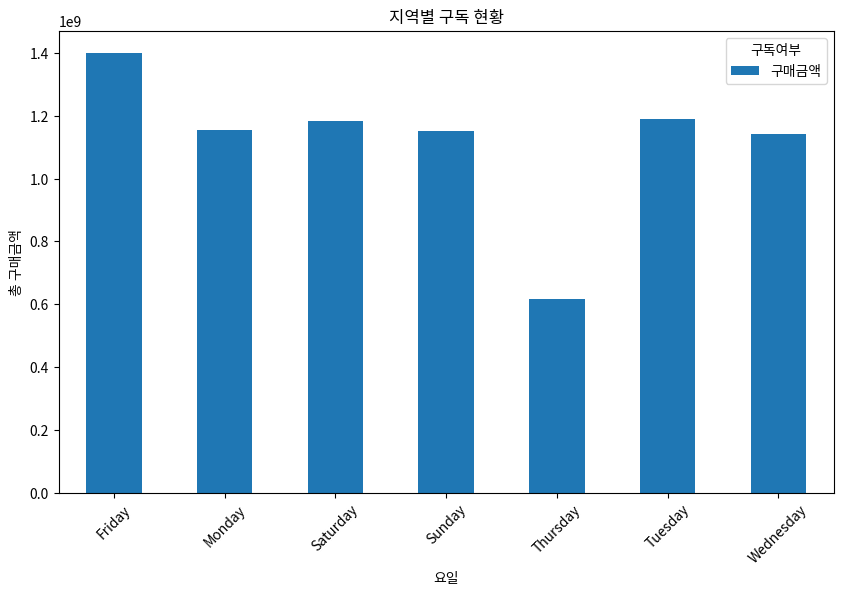

In [36]:
tmp1.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('지역별 구독 현황')
plt.xlabel('요일')
plt.ylabel('총 구매금액')
plt.xticks(rotation=45)
plt.legend(title='구독여부')
plt.show()


In [33]:
cross_table = pd.crosstab(tmp['요일'], tmp['구매금액'].sum())
cross_table

col_0,7.837940e+09
요일,
Friday,119280
Monday,97560
Saturday,100878
Sunday,96471
Thursday,52427
Tuesday,100388
Wednesday,95691


In [39]:
f_result= stats.f_oneway(cross_table)

# 결과 출력
f,p = f_result.statistic.round(3), f_result.pvalue.round(3) 

TypeError: at least two inputs are required; got 1.